<a href="https://colab.research.google.com/github/Gwilson337/Project-4/blob/main/FinalProject/NFL_Fantasy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import random
import numpy as np

In [2]:
#Create file paths
csv_path1 = Path("/content/FantasyPros_2019.csv")
csv_path2 = Path("/content/FantasyPros_2020.csv")
csv_path3 = Path("/content/FantasyPros_2021.csv")
csv_path4 = Path("/content/FantasyPros_2022.csv")
csv_path5 = Path("/content/FantasyPros_2023.csv")

# Create DataFrames
df1 = pd.read_csv(csv_path1)
df2 = pd.read_csv(csv_path2)
df3 = pd.read_csv(csv_path3)
df4 = pd.read_csv(csv_path4)
df5 = pd.read_csv(csv_path5)

# #Join DataFrames
# all_df = pd.concat([df1, df2, df3, df4, df5], axis = 1)
# all_df.head()
# # all_df.shape

In [3]:
df1 = df1[["#", "Player", "Pos", "AVG", "TTL"]].rename(columns={"#" : "2019_Rank", "AVG" : "2019_AVG", "TTL" : "2019_TTL"})
df2 = df2[["#", "Player", "AVG", "TTL"]].rename(columns={"#" : "2020_Rank", "AVG" : "2020_AVG", "TTL" : "2020_TTL"})
df3 = df3[["#", "Player", "AVG", "TTL"]].rename(columns={"#" : "2021_Rank", "AVG" : "2021_AVG", "TTL" : "2021_TTL"})
df4 = df4[["#", "Player", "AVG", "TTL"]].rename(columns={"#" : "2022_Rank", "AVG" : "2022_AVG", "TTL" : "2022_TTL"})
df5 = df5[["Player", "TTL"]].rename(columns={"TTL" : "2023_TTL"})

all_df = pd.merge(df1, df2, on="Player", how="inner")
all_df = pd.merge(all_df, df3, on="Player", how="inner")
all_df = pd.merge(all_df, df4, on="Player", how="inner")
all_df = pd.merge(all_df, df5, on="Player", how="inner")

all_df

,2019_Rank,Player,Pos,2019_AVG,2019_TTL,2020_Rank,2020_AVG,2020_TTL,2021_Rank,2021_AVG,2021_TTL,2022_Rank,2022_AVG,2022_TTL,2023_TTL
0,1,Lamar Jackson,QB,28.1,421.7,10,22.8,341.8,19,21.1,253.0,19,20.3,243.1,338.2
1,2,Christian McCaffrey,RB,22.2,355.2,222,24.5,73.4,191,12.9,90.5,14,16.0,271.4,324.3
2,3,Dak Prescott,QB,21.8,348.8,91,27.7,138.6,8,20.7,330.6,28,17.8,213.6,351.8
3,4,Jameis Winston,QB,21.0,335.4,573,0.6,2.4,127,17.2,120.4,292,16.3,48.9,15.0
4,5,Russell Wilson,QB,20.9,333.6,6,23.3,372.8,20,17.8,248.8,22,15.7,235.8,264.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,565,Keith Kirkwood,WR,0.0,0.0,597,1.3,1.3,602,0.6,1.7,593,0.6,1.8,9.7
273,642,Tim Boyle,QB,0.0,-0.1,717,-0.1,-0.9,377,7.6,30.3,718,-0.9,-0.9,14.9
274,643,Nick Mullens,QB,-0.2,-0.3,109,12.8,128.3,498,9.9,9.9,468,3.2,12.8,74.7
275,648,Ray-Ray McCloud III,WR,-0.3,-2.0,466,0.8,12.2,388,1.7,27.2,311,2.6,44.1,16.5


In [4]:
# Check for missing values
# all_df.isnull().value_counts()

In [5]:
# Check data types
all_df.dtypes

2019_Rank      int64
Player        object
Pos           object
2019_AVG     float64
2019_TTL     float64
2020_Rank      int64
2020_AVG     float64
2020_TTL     float64
2021_Rank      int64
2021_AVG     float64
2021_TTL     float64
2022_Rank      int64
2022_AVG     float64
2022_TTL     float64
2023_TTL     float64
dtype: object

In [6]:
# Change rank column to float and verify
all_df[["2019_Rank", "2020_Rank", "2021_Rank", "2022_Rank"]] = all_df[["2019_Rank", "2020_Rank", "2021_Rank", "2022_Rank"]].astype("float")
all_df.dtypes

2019_Rank    float64
Player        object
Pos           object
2019_AVG     float64
2019_TTL     float64
2020_Rank    float64
2020_AVG     float64
2020_TTL     float64
2021_Rank    float64
2021_AVG     float64
2021_TTL     float64
2022_Rank    float64
2022_AVG     float64
2022_TTL     float64
2023_TTL     float64
dtype: object

In [7]:
# Set player name as index
all_df = all_df.set_index("Player")
all_df.head()

,2019_Rank,Pos,2019_AVG,2019_TTL,2020_Rank,2020_AVG,2020_TTL,2021_Rank,2021_AVG,2021_TTL,2022_Rank,2022_AVG,2022_TTL,2023_TTL
Player,,,,,,,,,,,,,,
Lamar Jackson,1.0,QB,28.1,421.7,10.0,22.8,341.8,19.0,21.1,253.0,19.0,20.3,243.1,338.2
Christian McCaffrey,2.0,RB,22.2,355.2,222.0,24.5,73.4,191.0,12.9,90.5,14.0,16.0,271.4,324.3
Dak Prescott,3.0,QB,21.8,348.8,91.0,27.7,138.6,8.0,20.7,330.6,28.0,17.8,213.6,351.8
Jameis Winston,4.0,QB,21.0,335.4,573.0,0.6,2.4,127.0,17.2,120.4,292.0,16.3,48.9,15.0
Russell Wilson,5.0,QB,20.9,333.6,6.0,23.3,372.8,20.0,17.8,248.8,22.0,15.7,235.8,264.9


In [8]:
# Get list of columns to store as features
all_df.columns

Index(['2019_Rank', 'Pos', '2019_AVG', '2019_TTL', '2020_Rank', '2020_AVG',
       '2020_TTL', '2021_Rank', '2021_AVG', '2021_TTL', '2022_Rank',
       '2022_AVG', '2022_TTL', '2023_TTL'],
      dtype='object')

In [9]:
# Drop position column and verify
all_df = all_df.drop(columns="Pos")
all_df.head()

,2019_Rank,2019_AVG,2019_TTL,2020_Rank,2020_AVG,2020_TTL,2021_Rank,2021_AVG,2021_TTL,2022_Rank,2022_AVG,2022_TTL,2023_TTL
Player,,,,,,,,,,,,,
Lamar Jackson,1.0,28.1,421.7,10.0,22.8,341.8,19.0,21.1,253.0,19.0,20.3,243.1,338.2
Christian McCaffrey,2.0,22.2,355.2,222.0,24.5,73.4,191.0,12.9,90.5,14.0,16.0,271.4,324.3
Dak Prescott,3.0,21.8,348.8,91.0,27.7,138.6,8.0,20.7,330.6,28.0,17.8,213.6,351.8
Jameis Winston,4.0,21.0,335.4,573.0,0.6,2.4,127.0,17.2,120.4,292.0,16.3,48.9,15.0
Russell Wilson,5.0,20.9,333.6,6.0,23.3,372.8,20.0,17.8,248.8,22.0,15.7,235.8,264.9


In [10]:
# Separate features from label
labelName = ["2023_TTL"]
featureNames = ['2019_Rank', '2019_AVG', '2019_TTL', '2020_Rank', '2020_AVG',
       '2020_TTL', '2021_Rank', '2021_AVG', '2021_TTL', '2022_Rank',
       '2022_AVG', '2022_TTL']
dfFeatures = all_df[featureNames]
dfFeatures.head()

,2019_Rank,2019_AVG,2019_TTL,2020_Rank,2020_AVG,2020_TTL,2021_Rank,2021_AVG,2021_TTL,2022_Rank,2022_AVG,2022_TTL
Player,,,,,,,,,,,,
Lamar Jackson,1.0,28.1,421.7,10.0,22.8,341.8,19.0,21.1,253.0,19.0,20.3,243.1
Christian McCaffrey,2.0,22.2,355.2,222.0,24.5,73.4,191.0,12.9,90.5,14.0,16.0,271.4
Dak Prescott,3.0,21.8,348.8,91.0,27.7,138.6,8.0,20.7,330.6,28.0,17.8,213.6
Jameis Winston,4.0,21.0,335.4,573.0,0.6,2.4,127.0,17.2,120.4,292.0,16.3,48.9
Russell Wilson,5.0,20.9,333.6,6.0,23.3,372.8,20.0,17.8,248.8,22.0,15.7,235.8


In [11]:
# View testing data
dfLabels = all_df[labelName]
dfLabels.head()

,2023_TTL
Player,
Lamar Jackson,338.2
Christian McCaffrey,324.3
Dak Prescott,351.8
Jameis Winston,15.0
Russell Wilson,264.9


In [12]:
# View training data and flatten array
labels = np.array(dfLabels).ravel()
features = np.array(dfFeatures)

In [13]:
# Split data into training and testing sets
train, test, trainLabels, testLabels = train_test_split(features, labels, test_size=(0.25), random_state=0)

In [14]:
# Create RandomForest instance
rf = RandomForestRegressor(random_state=0)

In [15]:
# Fit the model
rf.fit(train, trainLabels)

RandomForestRegressor(random_state=0)

In [16]:
# Create model prediction
rfPred = rf.predict(features)

In [17]:
# Create new dataframe, add columns, and check predictions vs actual data
fantasy_df = all_df[["2023_TTL"]]
fantasy_df["Points_Predicted"] = rfPred
fantasy_df["error"] = abs(fantasy_df["2023_TTL"]-fantasy_df["Points_Predicted"]).astype("int")

<ipython-input-17-9e3786f4e8a0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fantasy_df["Points_Predicted"] = rfPred
<ipython-input-17-9e3786f4e8a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fantasy_df["error"] = abs(fantasy_df["2023_TTL"]-fantasy_df["Points_Predicted"]).astype("int")


In [18]:
# View model performance
fantasy_df.describe()

,2023_TTL,Points_Predicted,error
count,277.000000,277.000000,277.000000
mean,76.967509,73.908765,17.111913
std,76.356259,60.232628,23.966427
min,-1.300000,0.864000,0.000000
25%,14.900000,22.780000,4.000000
50%,53.700000,60.914000,10.000000
75%,128.000000,116.123000,21.000000
max,410.600000,325.946000,266.000000


In [19]:
# View prediction model dataframe
fantasy_df.head()

,2023_TTL,Points_Predicted,error
Player,,,
Lamar Jackson,338.2,325.946,12
Christian McCaffrey,324.3,310.102,14
Dak Prescott,351.8,318.160,33
Jameis Winston,15.0,75.136,60
Russell Wilson,264.9,268.145,3


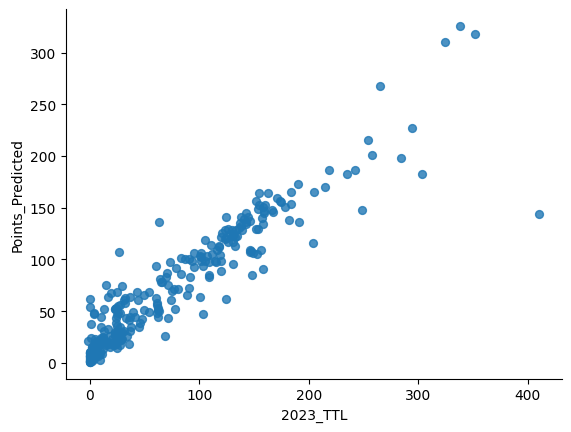

In [20]:
# @title 2023_TTL vs Points_Predicted

from matplotlib import pyplot as plt
fantasy_df.plot(kind='scatter', x='2023_TTL', y='Points_Predicted', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [21]:
# View in descending order
fantasy_df.sort_values("2023_TTL", ascending=False).head(20)

,2023_TTL,Points_Predicted,error
Player,,,
Josh Allen,410.6,144.387,266
Dak Prescott,351.8,318.160,33
Lamar Jackson,338.2,325.946,12
Christian McCaffrey,324.3,310.102,14
Jared Goff,303.1,182.293,120
Patrick Mahomes II,294.2,227.448,66
Baker Mayfield,284.1,198.300,85
Russell Wilson,264.9,268.145,3
Tyreek Hill,257.4,200.985,56


In [22]:
# Split data into training and testing sets
train, test, trainLabels, testLabels = train_test_split(features, labels, test_size=(0.25), random_state=10)

In [23]:
# Create RandomForest instance
rf = RandomForestRegressor(random_state=10)

In [24]:
# Fit the model
rf.fit(train, trainLabels)

RandomForestRegressor(random_state=10)

In [25]:
# Create model prediction
rfPred = rf.predict(features)

In [26]:
# Create new dataframe, add columns, and check predictions vs actual data
fantasy_df2 = all_df[["2023_TTL"]]
fantasy_df2["Points_Predicted"] = rfPred
fantasy_df2["error"] = abs(fantasy_df["2023_TTL"]-fantasy_df2["Points_Predicted"]).astype("int")

<ipython-input-26-57cc7dd986cc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fantasy_df2["Points_Predicted"] = rfPred
<ipython-input-26-57cc7dd986cc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fantasy_df2["error"] = abs(fantasy_df["2023_TTL"]-fantasy_df2["Points_Predicted"]).astype("int")


In [27]:
# View model performance
fantasy_df2.describe()

,2023_TTL,Points_Predicted,error
count,277.000000,277.000000,277.000000
mean,76.967509,75.691365,17.620939
std,76.356259,64.343834,21.848391
min,-1.300000,0.557000,0.000000
25%,14.900000,22.280000,3.000000
50%,53.700000,60.716000,10.000000
75%,128.000000,122.284000,24.000000
max,410.600000,312.767000,156.000000


In [28]:
# View prediction model dataframe
fantasy_df2.head()

,2023_TTL,Points_Predicted,error
Player,,,
Lamar Jackson,338.2,312.767,25
Christian McCaffrey,324.3,292.816,31
Dak Prescott,351.8,305.595,46
Jameis Winston,15.0,23.262,8
Russell Wilson,264.9,268.217,3


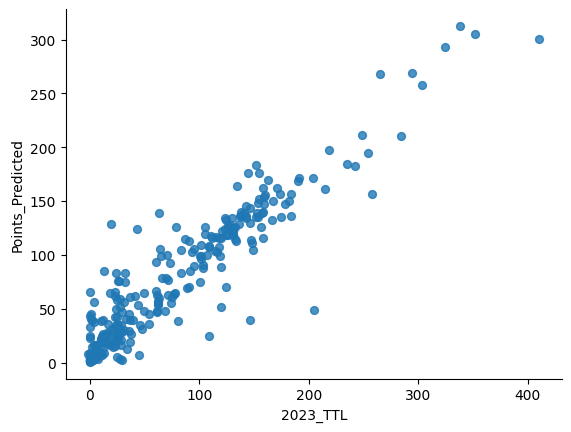

In [29]:
# @title 2023_TTL vs Points_Predicted

from matplotlib import pyplot as plt
fantasy_df2.plot(kind='scatter', x='2023_TTL', y='Points_Predicted', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [30]:
# View in descending order
fantasy_df2.sort_values("2023_TTL", ascending=False).head(20)

,2023_TTL,Points_Predicted,error
Player,,,
Josh Allen,410.6,300.620,109
Dak Prescott,351.8,305.595,46
Lamar Jackson,338.2,312.767,25
Christian McCaffrey,324.3,292.816,31
Jared Goff,303.1,258.222,44
Patrick Mahomes II,294.2,269.219,24
Baker Mayfield,284.1,210.537,73
Russell Wilson,264.9,268.217,3
Tyreek Hill,257.4,156.908,100


In [31]:
# Split data into training and testing sets
train, test, trainLabels, testLabels = train_test_split(features, labels, test_size=(0.10), random_state=75)

In [32]:
# Create RandomForest instance
rf = RandomForestRegressor(random_state=75)

In [33]:
# Fit the model
rf.fit(train, trainLabels)

RandomForestRegressor(random_state=75)

In [34]:
# Create model prediction
rfPred = rf.predict(features)

In [35]:
# Create new dataframe, add columns, and check predictions vs actual data
fantasy_df3 = all_df[["2023_TTL"]]
fantasy_df3["Points_Predicted"] = rfPred
fantasy_df3["error"] = abs(fantasy_df["2023_TTL"]-fantasy_df3["Points_Predicted"]).astype("int")

<ipython-input-35-ab856897b93c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fantasy_df3["Points_Predicted"] = rfPred
<ipython-input-35-ab856897b93c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fantasy_df3["error"] = abs(fantasy_df["2023_TTL"]-fantasy_df3["Points_Predicted"]).astype("int")


In [36]:
# View model performance
fantasy_df3.describe()

,2023_TTL,Points_Predicted,error
count,277.000000,277.000000,277.000000
mean,76.967509,77.034007,14.386282
std,76.356259,66.156399,18.892302
min,-1.300000,1.332000,0.000000
25%,14.900000,20.888000,3.000000
50%,53.700000,60.502000,8.000000
75%,128.000000,124.801000,20.000000
max,410.600000,348.448000,171.000000


In [37]:
# View prediction model dataframe
fantasy_df3.head()

,2023_TTL,Points_Predicted,error
Player,,,
Lamar Jackson,338.2,307.706,30
Christian McCaffrey,324.3,277.880,46
Dak Prescott,351.8,318.362,33
Jameis Winston,15.0,41.619,26
Russell Wilson,264.9,254.732,10


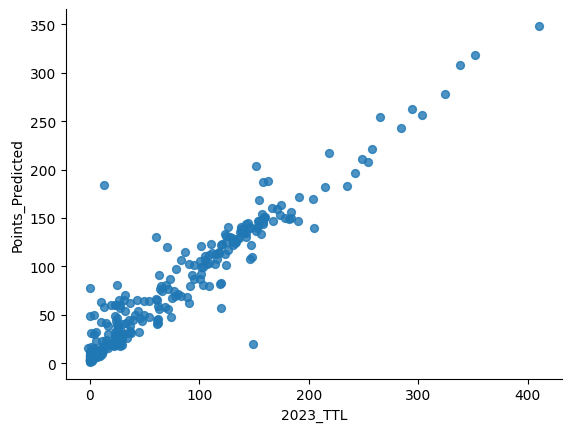

In [38]:
# @title 2023_TTL vs Points_Predicted

from matplotlib import pyplot as plt
fantasy_df3.plot(kind='scatter', x='2023_TTL', y='Points_Predicted', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [39]:
# View in descending order
fantasy_df3.sort_values("2023_TTL", ascending=False).head(20)

,2023_TTL,Points_Predicted,error
Player,,,
Josh Allen,410.6,348.448,62
Dak Prescott,351.8,318.362,33
Lamar Jackson,338.2,307.706,30
Christian McCaffrey,324.3,277.880,46
Jared Goff,303.1,256.157,46
Patrick Mahomes II,294.2,263.030,31
Baker Mayfield,284.1,243.317,40
Russell Wilson,264.9,254.732,10
Tyreek Hill,257.4,221.619,35
